In [31]:
import numpy as np
import pathlib
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [53]:
input_shape = (375,)
batch_size = 16

cwd = os.getcwd()
x_train_dir = pathlib.Path(cwd + '/data/X_train_375_2.npz')
y_train_dir = pathlib.Path(cwd + '/data/Y_train_195.npz')
x_test_dir  = pathlib.Path(cwd + '/data/X_test_375_2.npz')
y_test_dir  = pathlib.Path(cwd + '/data/Y_test_195.npz')
checkpoint_dir = pathlib.Path('D:./TF_checkpoint/mlp/weight/')
model_dir = pathlib.Path('D:./TF_backup/mlp/mlp7_399.h5')

x_train = np.asarray(np.load(x_train_dir, allow_pickle=True)['arr_0'], dtype=np.float32)
y_train = np.asarray(np.load(y_train_dir, allow_pickle=True)['arr_0'], dtype=np.float32)
x_test = np.asarray(np.load(x_test_dir, allow_pickle=True)['arr_0'], dtype=np.float32)
y_test = np.asarray(np.load(y_test_dir, allow_pickle=True)['arr_0'], dtype=np.float32)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    checkpoint_dir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
)

In [54]:
print(np.shape(x_train))

(6720, 375)


In [55]:
normalizer = layers.Normalization()
normalizer.adapt(x_train)

# Define model
input_layer = layers.Input(shape=input_shape)
norm = normalizer(input_layer)
den1 = layers.Dense(512, activation='relu', kernel_initializer='HeNormal')(norm)
drop1 = layers.Dropout(0.2)(den1)
den2 = layers.Dense(512, activation='relu', kernel_initializer='HeNormal')(drop1)
drop2 = layers.Dropout(0.2)(den2)
den3 = layers.Dense(256, activation='relu', kernel_initializer='HeNormal')(drop2)
drop3 = layers.Dropout(0.2)(den3)
den4 = layers.Dense(14, activation='softmax')(drop3)
model = keras.Model(input_layer, den4)

opt = tf.keras.optimizers.SGD(
    learning_rate=0.0001,
    momentum=0.8,
    nesterov=True,
    name='SGD',
)

model.compile(
    optimizer=opt, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
    )

In [48]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 771)]             0         
                                                                 
 normalization_11 (Normaliza  (None, 771)              1543      
 tion)                                                           
                                                                 
 dense_44 (Dense)            (None, 1024)              790528    
                                                                 
 dropout_33 (Dropout)        (None, 1024)              0         
                                                                 
 dense_45 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_34 (Dropout)        (None, 1024)              0         
                                                          

In [56]:
epochs = 50
model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, callbacks=[model_checkpoint])
model.save(model_dir)

Epoch 1/50
420/420 [==============================] - 2s 5ms/step - loss: 3.0831 - accuracy: 0.0701
Epoch 2/50
420/420 [==============================] - 2s 4ms/step - loss: 2.9703 - accuracy: 0.0749
Epoch 3/50
420/420 [==============================] - 2s 4ms/step - loss: 2.9215 - accuracy: 0.0741
Epoch 4/50
420/420 [==============================] - 2s 4ms/step - loss: 2.8984 - accuracy: 0.0698
Epoch 5/50
420/420 [==============================] - 2s 4ms/step - loss: 2.8459 - accuracy: 0.0717
Epoch 6/50
420/420 [==============================] - 2s 4ms/step - loss: 2.8343 - accuracy: 0.0737
Epoch 7/50
420/420 [==============================] - 2s 4ms/step - loss: 2.8269 - accuracy: 0.0738
Epoch 8/50
420/420 [==============================] - 2s 4ms/step - loss: 2.8132 - accuracy: 0.0756
Epoch 9/50
420/420 [==============================] - 2s 4ms/step - loss: 2.8035 - accuracy: 0.0717
Epoch 10/50
420/420 [==============================] - 2s 4ms/step - loss: 2.7854 - accuracy: 0.0783

In [52]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

53/53 [==============================] - 0s 5ms/step - loss: 2.6916 - accuracy: 0.0685
Test loss: 2.691631555557251
Test accuracy: 0.0684523805975914


In [13]:
print(np.shape(np.array([x_test])))

(1, 1680, 219)


array([[18, 10,  3,  4, 11,  2,  9,  4,  9,  3,  9,  8,  6, 13],9.9% ...
       [11, 14,  4, 11, 10,  8,  8, 15,  7, 11,  7,  9,  9, 10],
       [ 5, 11, 13, 10,  9, 12,  5, 12, 10, 12, 10,  8, 13, 11],
       [ 9,  6, 25, 22, 17, 21,  8, 10, 23, 15, 15, 17, 13,  6],
       [ 3,  0,  3,  1,  4,  2,  2,  2,  0,  2,  0,  3,  1,  0],
       [ 5,  9, 15, 12, 10, 14,  5,  6, 11, 15, 14, 10, 12,  4],
       [ 9,  4,  4,  4,  8,  2, 13,  5,  9,  7,  5,  4,  4,  8],
       [ 3,  6,  3,  2,  7,  3,  5,  5,  3,  3,  3,  7, 10,  2],
       [ 3,  7,  9,  5,  5,  9,  5,  7, 10,  5, 13,  7,  9,  3],
       [20, 27, 26, 32, 18, 34, 19, 30, 28, 21, 24, 25, 28, 18],
       [ 4,  5,  4,  1,  1,  1,  1,  3,  0,  3,  3,  2,  1,  0],
       [ 6,  4,  3,  6,  9,  2,  5,  8,  4, 11,  7, 10,  7,  6],
       [ 5,  9,  2,  2,  2,  3,  2,  4,  3,  2,  3,  3,  2,  4],
       [19,  8,  6,  8,  9,  7, 33,  9,  3, 10,  7,  7,  5, 35]],
      dtype=int16)


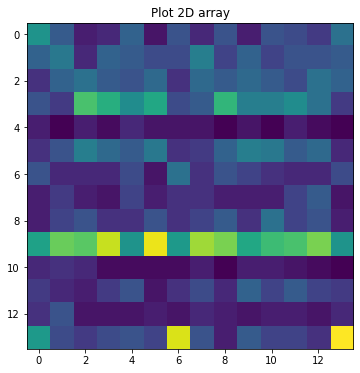

In [57]:
# draw confusion matrix
import sys
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush() 

i = 0
cmatrix = np.zeros((14,14), dtype=np.int16)
for i in range(len(x_test)):
    progress(i, 1680)
    result = model.predict(np.array([x_test[i]])).flatten()
    id1 = np.argmax(result)
    id2 = np.argmax(y_test[i])
    cmatrix[id1][id2] = cmatrix[id1][id2] + 1
    # break

cmatrix = np.absolute(cmatrix)
print(repr(cmatrix))

fig = plt.figure(figsize=(6,6))
plt.imshow(cmatrix)
plt.title("Plot 2D array")
plt.show()

Confusion: <br>
flatten vs brittle <br>
plated partially_purple vs plated purple


In [58]:
acc = []
for i in range(14):
    acc.append(np.round(cmatrix[i][i]/120,3))
print(acc)

[0.15, 0.117, 0.108, 0.183, 0.033, 0.117, 0.108, 0.042, 0.083, 0.175, 0.025, 0.083, 0.017, 0.292]
